In [1]:
import pandas as pd
df=pd.read_excel("default of credit card clients.xls")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

#sin primera fila y columna ID
df = df.iloc[1:, 1:]

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [4]:
X = df.drop(columns=['Y']).values.astype(float)
Y = df['Y'].values.astype(float)

# Train 80% y test 20%
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Train 80% y 20% validación
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

In [8]:
#Selección de Hiperparámetros


parametros = {
    'mlclassifier__hidden_layer_sizes': [(5,),(7,),(9,),(10,),(20,),(25,)],
    'mlclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
}

pipeline = Pipeline([('mlclassifier', MLPClassifier())])
grid_search = GridSearchCV(pipeline, parametros, cv=7, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#mejores parámetros y estimadores
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy:", accuracy_score(y_valid, best_estimator.predict(X_valid)))

Mejores parámetros: {'mlclassifier__activation': 'tanh', 'mlclassifier__alpha': 0.0001, 'mlclassifier__hidden_layer_sizes': (5,)}
Mejor accuracy: 0.7766666666666666


accuracy: 0.8197916666666667


<Axes: >

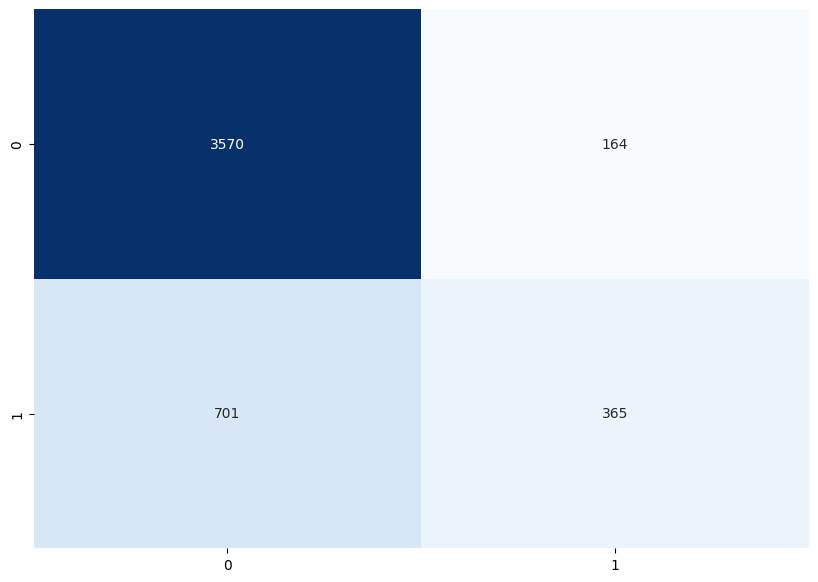

In [13]:
#Modelo y entrenamiento
mlp_reg = MLPClassifier(hidden_layer_sizes=[5], activation='tanh', alpha=0.0001, random_state=352)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
scores = cross_val_score(pipeline, X_train, y_train, cv=7, scoring='accuracy', n_jobs=-1)
pipeline.fit(X_train, y_train)

#predicciones
y_pred_valid = pipeline.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred_valid)
print("accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_valid, y_pred_valid)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)

In [14]:
import joblib
joblib.dump(pipeline, 'modelo/modelo.pkl')
#pipeline_cargado = joblib.load('models/modelo.pkl')

['modelo/modelo.pkl']